# Historical Time Series of Impacts in Pakistan

From 2000 to 2020

In [2]:
from flood_model_paper import *


In [3]:
# Load generated data
years = np.arange(2000, 2022 + 1)

impact_data_dir = DATA_GEN_DIR / "flood-impact-pakistan"
data = pd.concat(
    [
        pd.read_json(
            impact_data_dir
            / "no-protection"
            / f"unsequa-impact-time-series-{year}.json"
        )
        for year in years
    ]
)
data_flopros = pd.concat(
    [
        pd.read_json(
            impact_data_dir / "flopros" / f"unsequa-impact-time-series-{year}.json"
        )
        for year in years
    ]
)

data = pd.concat([data, data_flopros])
data


aai_agg       date     Protection
0     387.615741 2000-01-31  No Protection
1     640.111920 2000-01-31  No Protection
2     595.709140 2000-01-31  No Protection
3     595.709140 2000-01-31  No Protection
4     640.111920 2000-01-31  No Protection
...          ...        ...            ...
4603    0.000000 2022-12-31        FLOPROS
4604    0.000000 2022-12-31        FLOPROS
4605    0.000000 2022-12-31        FLOPROS
4606    0.000000 2022-12-31        FLOPROS
4607    0.000000 2022-12-31        FLOPROS

[211968 rows x 3 columns]

In [4]:
from functools import partial

data_piv = pd.pivot_table(
    data,
    values="aai_agg",
    index="date",
    columns="Protection",
    aggfunc=[
        "median",
        "std",
        partial(np.quantile, q=0.05),
        partial(np.quantile, q=0.95),
    ],
)
data_piv


median                          std                 \
Protection       FLOPROS No Protection        FLOPROS  No Protection   
date                                                                   
2000-01-31  0.000000e+00  2.342530e+03       0.000000   51456.103779   
2000-02-29  0.000000e+00  2.308735e+03       0.000000   50334.374493   
2000-03-31  0.000000e+00  2.944607e+03       0.000000   49784.625036   
2000-04-30  0.000000e+00  2.913037e+03       0.000000   49842.977917   
2000-05-31  0.000000e+00  3.072271e+03       0.000000   56424.902257   
...                  ...           ...            ...            ...   
2022-08-31  6.040004e+06  5.793742e+06  911946.347431  885968.377540   
2022-09-30  1.219152e+06  2.158634e+06  212081.275552  697549.569008   
2022-10-31  0.000000e+00  8.177738e+03       0.000000  149536.149246   
2022-11-30  0.000000e+00  5.133609e+03       0.000000  108653.236009   
2022-12-31  0.000000e+00  4.324994e+03       0.000000   97617.973467   

           functools.partial(<function quantile at 0x1182c5b80>, q=0.05)  \
Protection                                                       FLOPROS   
date                                                                       
2000-01-31                                       0.000000e+00              
2000-02-29                                       0.000000e+00              
2000-03-31                                       0.000000e+00              
2000-04-30                                       0.000000e+00              
2000-05-31                                       0.000000e+00              
...                                                       ...              
2022-08-31                                       4.742582e+06              
2022-09-30                                       9.409243e+05              
2022-10-31                                       0.000000e+00              
2022-11-30                                       0.000000e+00              
2022-12-31                                       0.000000e+00              

                          \
Protection No Protection   
date                       
2000-01-31  2.301982e+02   
2000-02-29  2.268120e+02   
2000-03-31  2.417240e+02   
2000-04-30  2.661208e+02   
2000-05-31  2.437852e+02   
...                  ...   
2022-08-31  4.669878e+06   
2022-09-30  1.356493e+06   
2022-10-31  7.837195e+02   
2022-11-30  5.473317e+02   
2022-12-31  4.765482e+02   

           functools.partial(<function quantile at 0x1182c5b80>, q=0.95)  \
Protection                                                       FLOPROS   
date                                                                       
2000-01-31                                       0.000000e+00              
2000-02-29                                       0.000000e+00              
2000-03-31                                       0.000000e+00              
2000-04-30                                       0.000000e+00              
2000-05-31                                       0.000000e+00              
...                                                       ...              
2022-08-31                                       8.061538e+06              
2022-09-30                                       1.655018e+06              
2022-10-31                                       0.000000e+00              
2022-11-30                                       0.000000e+00              
2022-12-31                                       0.000000e+00              

                          
Protection No Protection  
date                      
2000-01-31  1.066168e+04  
2000-02-29  1.050353e+04  
2000-03-31  1.264093e+04  
2000-04-30  1.283485e+04  
2000-05-31  1.186743e+04  
...                  ...  
2022-08-31  7.321300e+06  
2022-09-30  3.628319e+06  
2022-10-31  3.631822e+04  
2022-11-30  2.148494e+04  
2022-12-31  1.895246e+04  

[276 rows x 8 columns]

In [5]:
data_piv.loc[data_piv["median", "FLOPROS"] == 0].index


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date', length=183, freq=None)

(13879.0, 19358.0)

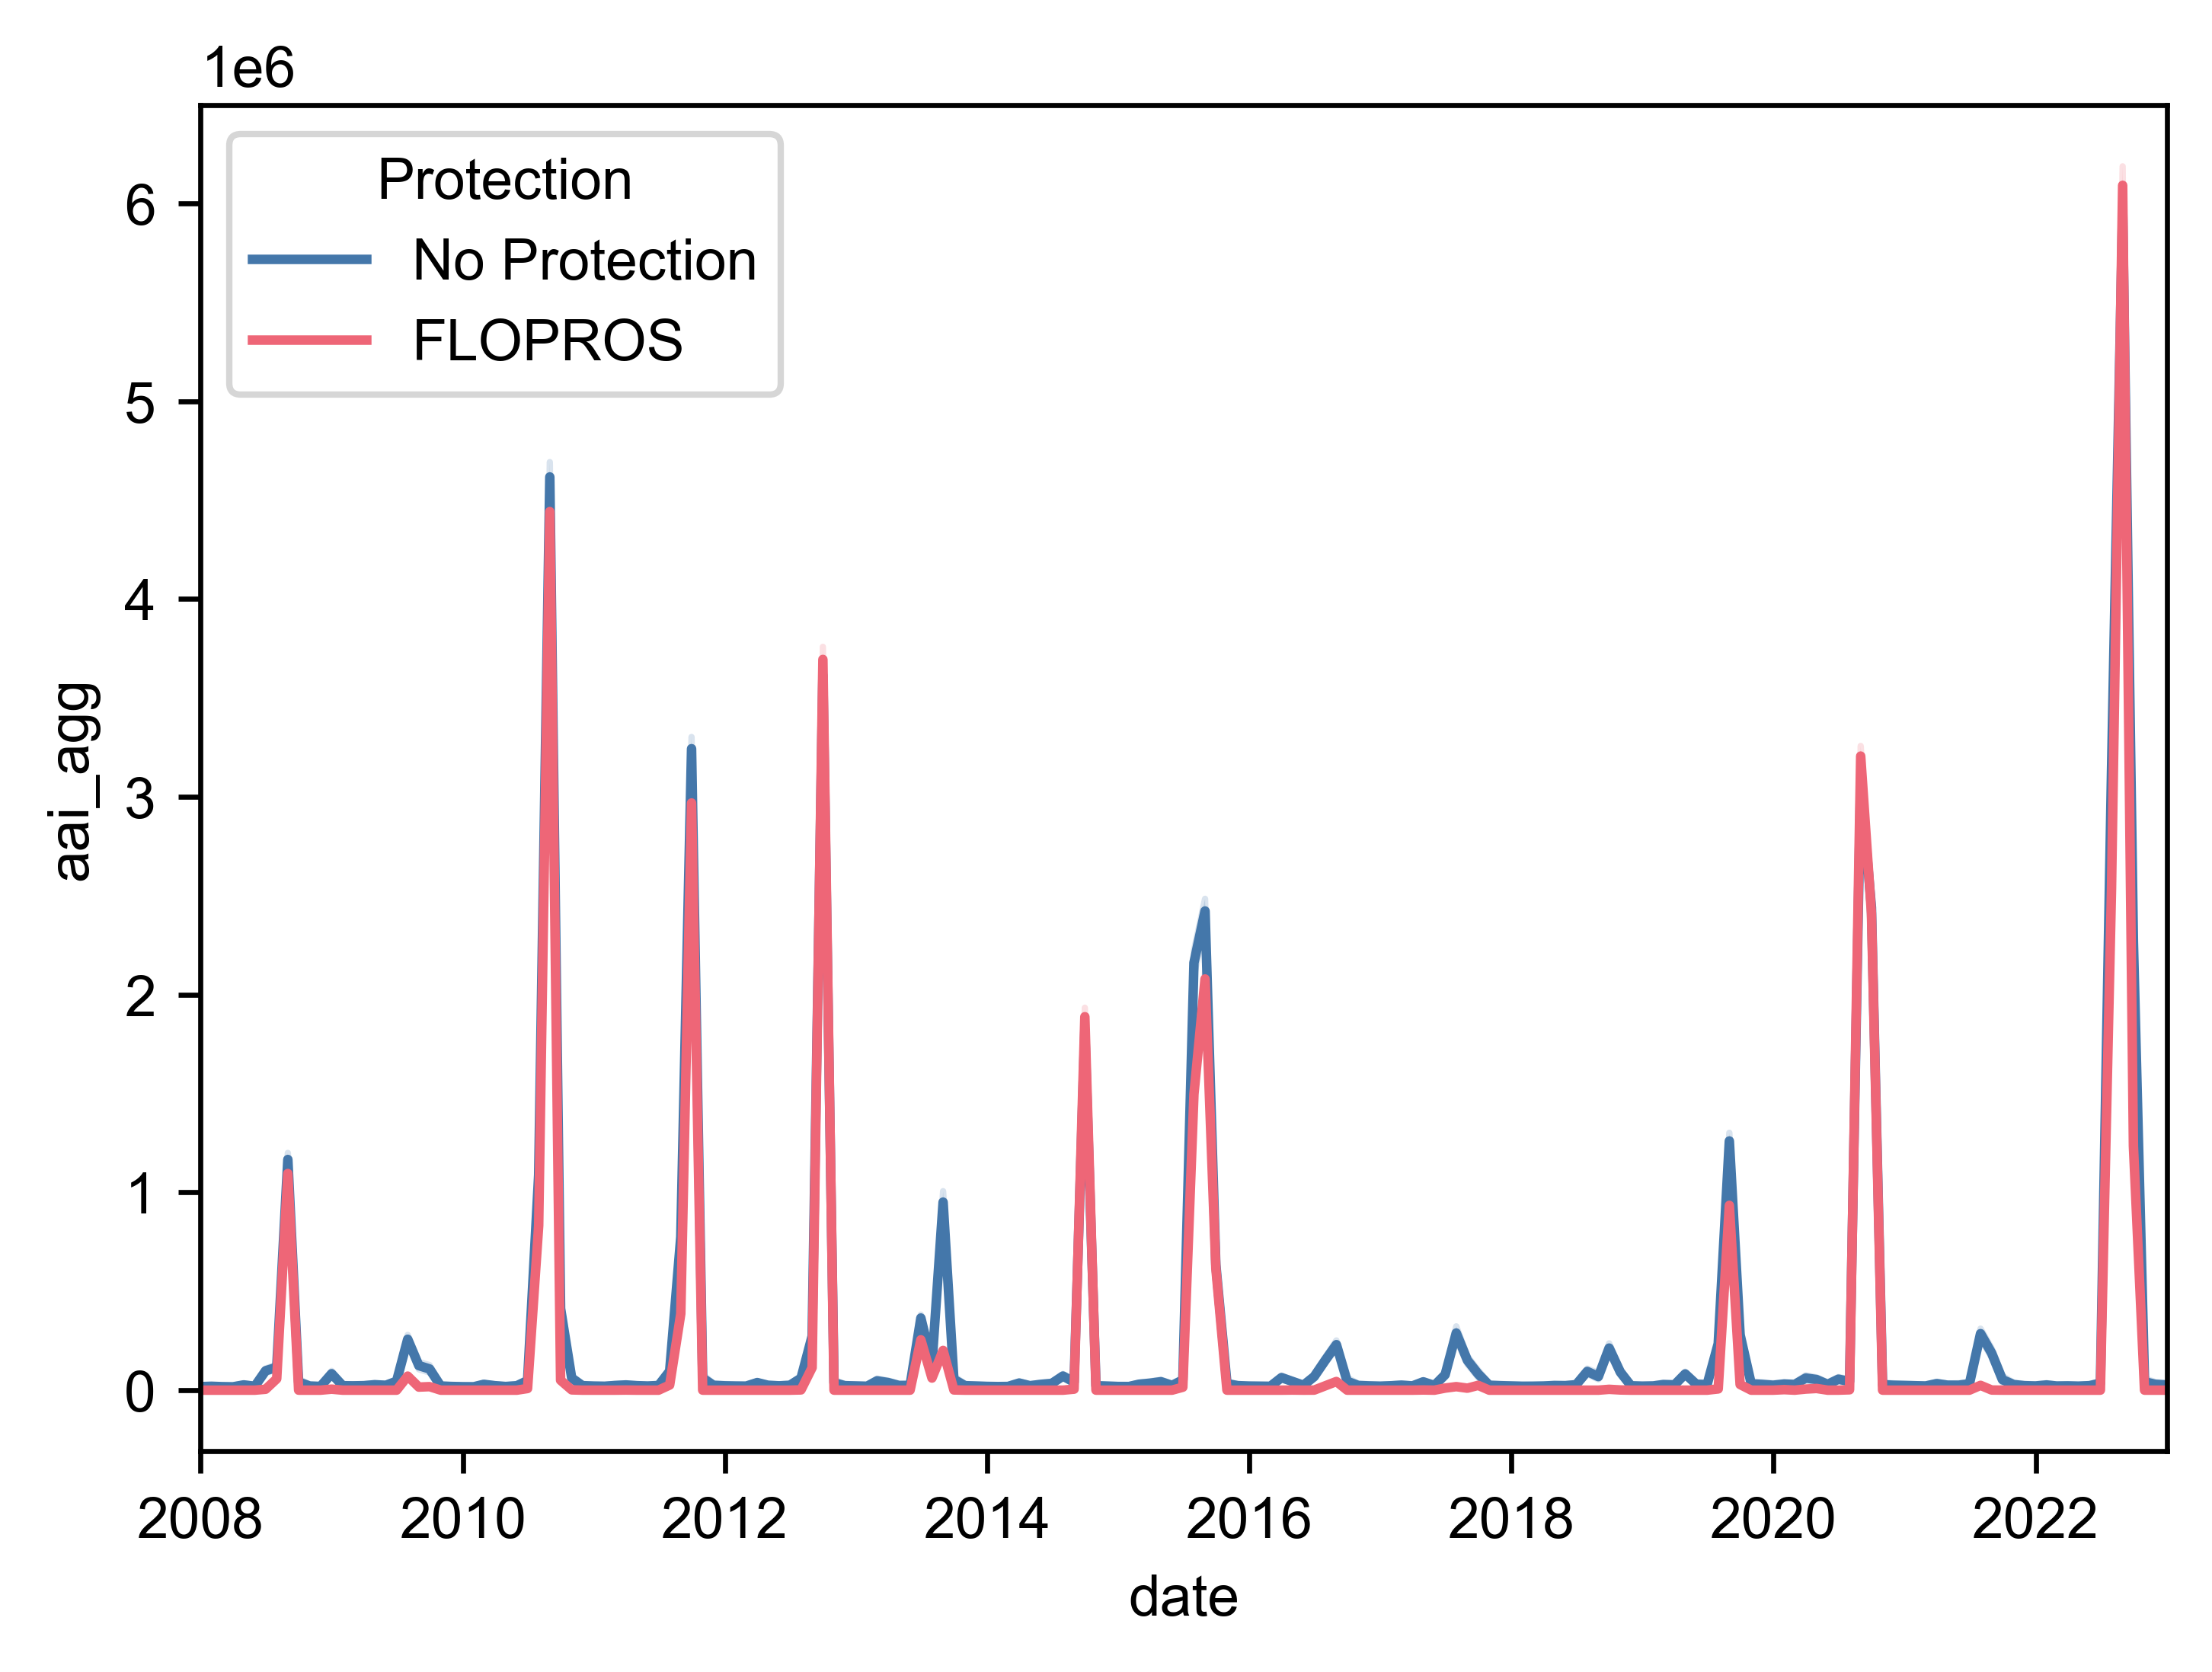

In [9]:
import seaborn as sns

sns.lineplot(data=data, x="date", y="aai_agg", hue="Protection")
plt.xlim(left=np.datetime64("2008-01-01"), right=np.datetime64("2023-01-01"))
# plt.yscale("log")
# plt.ylim(bottom=1e1)


## Mixed Plot

In [11]:
# From: https://reliefweb.int/disasters?advanced-search=%28C182%29_%28TY4611%29
unocha_flood_reports = np.array([
    "2010-07-31",
    "2011-08-31",
    "2012-08-31",
    "2013-08-31",
    "2014-09-30",
    "2015-07-31",
    "2016-03-31",
    # "2016-04-30",
    "2016-07-31",
    "2017-01-31",
    "2019-07-31",
    # "2019-08-31",
    "2020-08-31",
    # "2020-09-30",
    "2022-06-30",
    # "2022-07-31",
    # "2022-08-31",
], dtype="datetime64")


In [12]:
idmc_data = pd.read_excel(DATA_DIR / "IDMC_GIDD_Disasters_Internal_Displacement_Data_2008_2022.xlsx")
idmc_data_rs = idmc_data.set_index("Date of Event (start)").resample("M").sum()["Disaster Internal Displacements"]
idmc_data_rs = idmc_data_rs.loc[idmc_data_rs > 100]
idmc_data_rs


Date of Event (start)
2008-02-29       82000
2008-09-30         200
2009-01-31       84000
2010-01-31    11000000
2011-01-31      300000
2012-01-31     1857000
2013-07-31      124000
2014-05-31         520
2014-06-30         140
2014-07-31         756
2014-08-31        1865
2014-09-30      755324
2015-06-30        1200
2015-07-31        4000
2015-08-31      330000
2016-03-31       11000
2016-06-30        1700
2017-02-28         120
2017-06-30        1630
2018-06-30         760
2018-07-31        1000
2019-02-28       10060
2019-06-30       10000
2019-07-31       22150
2019-09-30        1200
2020-05-31         150
2020-06-30      810006
2021-03-31         160
2021-07-31        1802
2022-01-31        3414
2022-06-30     8159900
Name: Disaster Internal Displacements, dtype: int64

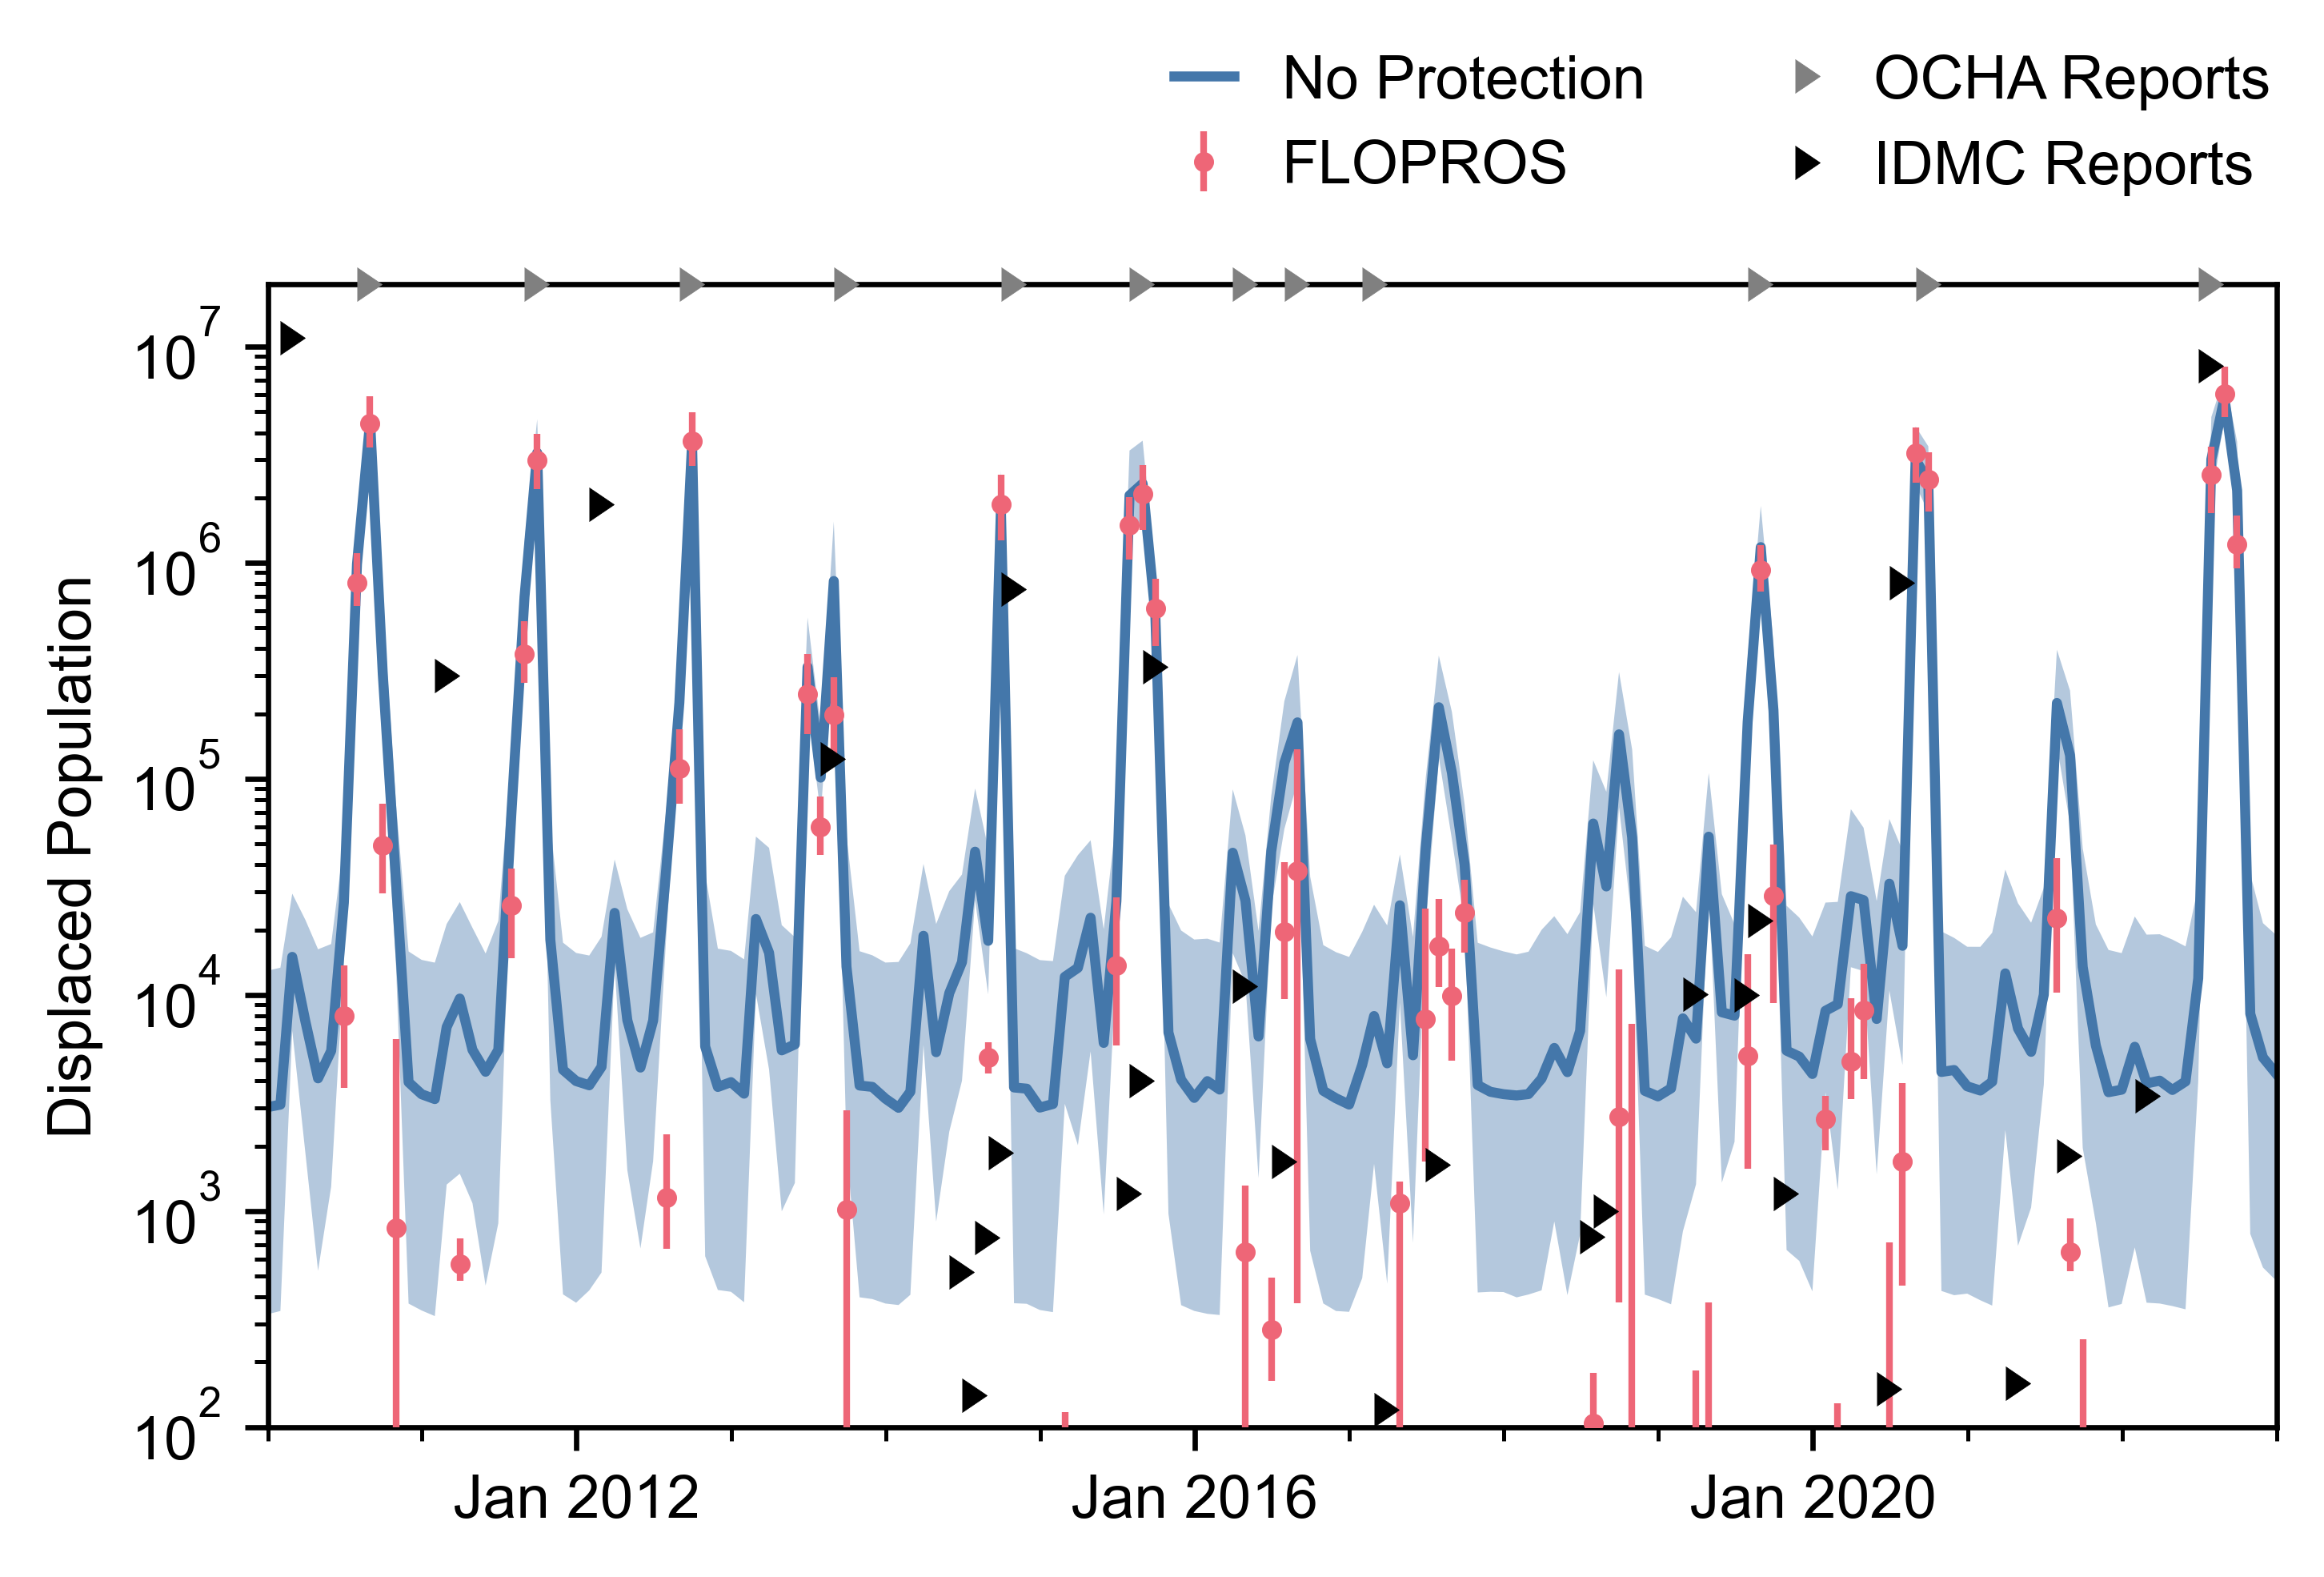

In [27]:
import matplotlib.dates as mdates
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDTH_TWO_COL, FIG_HEIGHT * 0.9))

# ax.errorbar(x=data_piv.index, y=data_piv["mean", "No Protection"], yerr=data_piv["std", "No Protection"], fmt="o")
# ax.errorbar(x=data_piv.index, y=data_piv["mean", "FLOPROS"], yerr=data_piv["std", "FLOPROS"], fmt="o")

ax.plot(data_piv.index, data_piv["median", "No Protection"], label="No Protection")
ax.fill_between(
    x=data_piv.index,
    y1=data_piv.iloc[:, 5],
    y2=data_piv.iloc[:, 7],
    alpha=0.4,
    ls="-",
    lw=1.0,
)

markerprops = dict(
    marker=9,
    markersize=5,
    markeredgewidth=0.1,
)

ax.plot(
    idmc_data_rs.index,
    idmc_data_rs,
    ls="None",
    color="k",
    markeredgecolor="k",
    label="IDMC Reports",
    zorder=10,
    **markerprops,
)

ax.set_yscale("log")
ax.set_autoscale_on(False)

ax.errorbar(
    x=data_piv.index,
    y=data_piv["median", "FLOPROS"],
    yerr=[
        data_piv["median", "FLOPROS"] - data_piv.iloc[:, 4],
        data_piv.iloc[:, 6] - data_piv["median", "FLOPROS"],
    ],
    # capsize=1.5,
    fmt="o",
    # linestyle=(0, (1, 1)),  # Densely dotted
    markersize=2,
    lw=1,
    zorder=5,
    label="FLOPROS",
    # color=colors[1],
)

# for date in unocha_flood_reports.flat:
#     ax.axvline(x=date, lw=1, color="grey", zorder=0)

# ax.set_ylim(bottom=1e2)
# xlims = dict(left=np.datetime64("2014-01-01"), right=np.datetime64("2023-01-01"))
xlims = dict(left=np.datetime64("2010-01-01"), right=np.datetime64("2023-01-01"))

ax.set_xlim(**xlims)
ax.set_ylim(bottom=100)
# ax.set_xlim(left=np.datetime64("2014-01-01"), right=np.datetime64("2023-01-01"))
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

ax.set_ylabel("Displaced Population")

# Labels via ticks
# twin = ax.twiny()
# twin.set_xticks(unocha_flood_reports)
# twin.set_xlim(left=np.datetime64("2014-01-01"), right=np.datetime64("2023-01-01"))
# twin.set_xlim(**xlims)
# twin.tick_params(axis="x", direction="in", labeltop=False, length=5, width=1)

# Labels via axvline
# for val in unocha_flood_reports:
# ax.axvline(
#     val,
#     1,
#     1.1,
#     color="grey",
#     lw=0,
#     marker=9,
#     markersize=7,
#     markeredgewidth=0.1,
#     markerfacecolor="grey",
#     markeredgecolor="grey",
#     # clip_on=False,
#     # label="OCHA Reports"
# )

# Labels via plot
# trf = ax.get_yaxis_transform()
unocha_plot = unocha_flood_reports[unocha_flood_reports > xlims["left"]]
ax.plot(
    unocha_plot,
    [1] * len(unocha_plot),
    color="grey",
    linestyle="None",
    markeredgecolor="grey",
    transform=ax.get_xaxis_transform(),
    clip_on=False,
    zorder=100,
    label="OCHA Reports",
    **markerprops,
)

h, l = ax.get_legend_handles_labels()
fig.legend(
    loc="outside upper right",
    # handles=[
    # h[0],
    # h[2],
    # h[1],
    # h[3],
    # mlines.Line2D(
    #     [],
    #     [],
    #     ls="None",
    #     marker=9,
    #     markersize=5,
    #     fillstyle="bottom",
    #     markerfacecolor="grey",
    #     markeredgecolor="grey",
    #     markerfacecoloralt="white",
    #     markeredgewidth=0,
    #     label="OCHA Reports",
    # ),
    # ],
    handles=[
        h[0],
        h[3],
        h[2],
        h[1],
    ],
    frameon=False,
    ncols=2,
    handlelength=1,
)

fig.savefig("impact-time-series.pdf")


In [ ]:
data_piv["median", "FLOPROS"].loc["2020-08-31"]


3218642.905146259

In [ ]:
data_piv["median", "FLOPROS"].loc["2022-08-31"]


6040004.2355663385

ISO3 Country / Territory  Year  \
0   PAK            Pakistan  2014   
1   PAK            Pakistan  2014   
2   PAK            Pakistan  2014   
3   PAK            Pakistan  2014   
4   PAK            Pakistan  2014   
..  ...                 ...   ...   
61  PAK            Pakistan  2022   
62  PAK            Pakistan  2022   
63  PAK            Pakistan  2022   
64  PAK            Pakistan  2022   
65  PAK            Pakistan  2022   

                                           Event Name Date of Event (start)  \
0                                Hyderabad july flood            2014-07-26   
1                               Mirpur district flood            2014-08-14   
2                                 Dadu district flood            2014-09-24   
3                               Attock district flood            2014-04-05   
4                          Bahawalpur september flood            2014-09-20   
..                                                ...                   ...   
61  Pakistan: Flood [monsoon] - (Balochistan) - 14...            2022-06-14   
62   Pakistan: Flood [monsoon] - (Sindh) - 14/06/2022            2022-06-14   
63  Pakistan: Flood [monsoon] - (Punjab) - 14/06/2022            2022-06-14   
64  Pakistan: Flood [monsoon] - (Azad Jammu and Ka...            2022-06-14   
65  Pakistan: Flood [monsoon] - (Gilgit-Baltistan)...            2022-06-14   

    Disaster Internal Displacements  Disaster Internal Displacements (Raw)  \
0                                 6                                      6   
1                                25                                     25   
2                                25                                     25   
3                                31                                     31   
4                                69                                     69   
..                              ...                                    ...   
61                           230000                                 229692   
62                          7245000                                7245490   
63                             4200                                   4163   
64                             2200                                   2224   
65                             4500                                   4536   

    Hazard Category Hazard Type Hazard Sub Type  
0   Weather related       Flood           Flood  
1   Weather related       Flood           Flood  
2   Weather related       Flood           Flood  
3   Weather related       Flood           Flood  
4   Weather related       Flood           Flood  
..              ...         ...             ...  
61  Weather related       Flood           Flood  
62  Weather related       Flood           Flood  
63  Weather related       Flood           Flood  
64  Weather related       Flood           Flood  
65  Weather related       Flood           Flood  

[66 rows x 10 columns]